In [12]:
import keepsake
import pandas as pd
import numpy as np

from validation_utils import transform_data_for_inference, line_color, downsample_df, run_inference, calculate_error, filter_df_by_signals, get_move_from_path

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('ggplot')

%matplotlib inline

In [13]:
keepsake.experiments.list(lambda exp: 
                              exp.params['accuracy'] == 1.0
                              and exp.params['model'] == 'random_forest'
                         )

id,created,params,latest_checkpoint,best_checkpoint
78ad688,2021-06-11 18:36:04.393607,"{'model': 'random_forest', 'f1': 1, 'dataset_test_size': 0.35, 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y'], 'hz': 20, 'data_set': 'base', 'feature_count': 5, 'accuracy': 1, 'quantization': None, 'recall': 1, 'precision': 1, 'other_params': 'default', 'n_estimators': 4}",cf9d863 (step 0; recall: 1),cf9d863 (step 0; recall: 1)
d5da9fe,2021-06-11 18:36:05.494630,"{'f1': 1, 'other_params': 'default', 'n_estimators': 5, 'precision': 1, 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y'], 'model': 'random_forest', 'accuracy': 1, 'data_set': 'base', 'recall': 1, 'quantization': None, 'feature_count': 5, 'hz': 20, 'dataset_test_size': 0.35}",5f27590 (step 0; recall: 1),5f27590 (step 0; recall: 1)
5b65d1f,2021-06-11 18:36:06.563546,"{'other_params': 'default', 'hz': 20, 'dataset_test_size': 0.35, 'accuracy': 1, 'f1': 1, 'model': 'random_forest', 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y'], 'recall': 1, 'n_estimators': 6, 'feature_count': 5, 'data_set': 'base', 'quantization': None, 'precision': 1}",16fff24 (step 0; recall: 1),16fff24 (step 0; recall: 1)
2c811ab,2021-06-11 18:36:07.637670,"{'f1': 1, 'feature_count': 5, 'hz': 20, 'model': 'random_forest', 'recall': 1, 'precision': 1, 'accuracy': 1, 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_z'], 'other_params': 'default', 'dataset_test_size': 0.35, 'quantization': None, 'data_set': 'base', 'n_estimators': 4}",c84f79e (step 0; recall: 1),c84f79e (step 0; recall: 1)
628e029,2021-06-11 18:36:11.523512,"{'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y'], 'recall': 1, 'quantization': None, 'accuracy': 1, 'other_params': 'default', 'f1': 1, 'data_set': 'base', 'precision': 1, 'n_estimators': 6, 'feature_count': 5, 'dataset_test_size': 0.35, 'hz': 50, 'model': 'random_forest'}",d04857d (step 0; recall: 1),d04857d (step 0; recall: 1)
232d3ae,2021-06-11 18:36:12.643836,"{'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_z'], 'precision': 1, 'model': 'random_forest', 'accuracy': 1, 'other_params': 'default', 'dataset_test_size': 0.35, 'f1': 1, 'n_estimators': 6, 'feature_count': 5, 'hz': 50, 'data_set': 'base', 'recall': 1, 'quantization': None}",0eab042 (step 0; recall: 1),0eab042 (step 0; recall: 1)
f28b45c,2021-06-11 18:36:13.792155,"{'f1': 1, 'other_params': 'default', 'dataset_test_size': 0.35, 'quantization': None, 'model': 'random_forest', 'data_set': 'base', 'feature_count': 6, 'precision': 1, 'hz': 50, 'accuracy': 1, 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'], 'recall': 1, 'n_estimators': 5}",e6409a1 (step 0; recall: 1),e6409a1 (step 0; recall: 1)


In [14]:
keepsake.experiments.list(lambda exp:
                              exp.params['accuracy'] == 1.0
                              and exp.params['model'] == 'decision_tree'
                        )

id,created,params,latest_checkpoint,best_checkpoint
30462fd,2021-06-11 18:36:14.962589,"{'accuracy': 1, 'n_estimators': None, 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x'], 'quantization': None, 'precision': 1, 'model': 'decision_tree', 'other_params': 'default', 'data_set': 'base', 'dataset_test_size': 0.35, 'f1': 1, 'feature_count': 4, 'recall': 1, 'hz': 25}",eafbd06 (step 0; recall: 1),eafbd06 (step 0; recall: 1)
36284c7,2021-06-11 18:36:16.018638,"{'f1': 1, 'accuracy': 1, 'dataset_test_size': 0.35, 'other_params': 'default', 'feature_count': 4, 'hz': 25, 'quantization': None, 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_y'], 'precision': 1, 'model': 'decision_tree', 'data_set': 'base', 'n_estimators': None, 'recall': 1}",727383b (step 0; recall: 1),727383b (step 0; recall: 1)
4edbe66,2021-06-11 18:36:17.069445,"{'recall': 1, 'feature_count': 4, 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_z'], 'hz': 25, 'precision': 1, 'dataset_test_size': 0.35, 'n_estimators': None, 'quantization': None, 'model': 'decision_tree', 'other_params': 'default', 'f1': 1, 'accuracy': 1, 'data_set': 'base'}",55f4a25 (step 0; recall: 1),55f4a25 (step 0; recall: 1)


In [15]:
from models.optimized.base.random_forest import random_forest_78ad688 as rf_1 # 20hz
from models.optimized.base.random_forest import random_forest_628e029 as rf_2 # 50hz

from models.optimized.base.decision_tree import decision_tree_30462fd as dt_1 # 25hz
from models.optimized.base.decision_tree import decision_tree_36284c7 as dt_2 # 25hz

In [16]:
rf_1_settings = keepsake.experiments.get('78ad688').params
rf_2_settings = keepsake.experiments.get('628e029').params

dt_1_settings = keepsake.experiments.get('30462fd').params
dt_2_settings = keepsake.experiments.get('36284c7').params

In [17]:
from models.baseline.base.random_forest import random_forest_20hz
from models.baseline.base.random_forest import random_forest_50hz

from models.baseline.base.decision_tree import decision_tree_25hz

In [90]:
# tuple format (loaded model, hz, plot coordinates, model name, id, stage, signals/features)

model_setups = [
    (rf_1, rf_1_settings['hz'], (0,0), rf_1_settings['model'], 1,'optimized', rf_1_settings['features']),
    (random_forest_20hz, 20, (1,0), 'random_forest', 1, 'baseline', ['acc_x','acc_y', 'acc_z','gyro_x','gyro_y','gyro_z']),
    
    (rf_2, rf_2_settings['hz'], (0,1), rf_2_settings['model'], 2,'optimized', rf_2_settings['features']),
    (random_forest_50hz, 50, (1,1), 'random_forest', 2, 'baseline', ['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z']),
    
    (dt_1, dt_1_settings['hz'], (0,2), dt_1_settings['model'], 3,'optimized', dt_1_settings['features']),
    (decision_tree_25hz, 25, (1,2), 'random_forest', 3, 'baseline',['acc_x','acc_y', 'acc_z','gyro_x','gyro_y','gyro_z']),
    
    (dt_2, dt_2_settings['hz'], (0,3), dt_2_settings['model'], 4,'optimized', dt_2_settings['features']),
    (decision_tree_25hz, 25, (1,3), 'random_forest', 4, 'baseline', ['acc_x','acc_y', 'acc_z','gyro_x','gyro_y','gyro_z']),
    
]

In [91]:
def run_validation_optimized(model_setups, dataset_path, dataset, is_plot=False, is_save_results=False):
    validation_results = []
    
    if is_plot:
        fig, ax = plt.subplots(nrows=int(len(model_setups) / 2), ncols=2, sharey=True, sharex=True, figsize=(30,25))

        blue_patch = mpatches.Patch(color='blue', label='X Movement')
        red_patch = mpatches.Patch(color='red', label='Y Movement')
        green_patch = mpatches.Patch(color='green', label='Circle Movement')
        fig.legend(handles=[blue_patch, red_patch, green_patch])

        fig.tight_layout()

    for setup in model_setups:
        MODEL = setup[0]
        FREQ = setup[1]
        SIGNALS = setup[-1]
        STEP = (1000 / FREQ)
        
        COL = setup[2][0]
        ROW = setup[2][1]

        df_val = pd.read_csv(dataset_path).set_index('ms')
        
        # initialize empty dataset to collect results
        inf_results = pd.DataFrame([],columns=['start','end','result'])

        df_downsampled = downsample_df(df_val, period=STEP)
        df_filtered = filter_df_by_signals(df_downsampled, SIGNALS)
        df_inference = transform_data_for_inference(df_filtered)
        
        # generate a list of steps    
        inference_step = list(np.arange(0, df_val.index[-1] + 1 - 1010, step=STEP))
        
        results_for_plot = []

        for st in inference_step:
            res = np.argmax(run_inference(df_inference, MODEL, st, STEP))
            inf_results = pd.concat([inf_results, pd.DataFrame([{'start':st,'end':st+1000,'result':res}])], axis=0)

            if res in [1,2,3]:
                color = line_color(res)
                results_for_plot.append((color, st))
                
            
        # Plot signals
        if is_plot:
            ax[ROW][COL].plot(df_filtered)

            for r in results_for_plot:
                color_plot = r[0]
                st_plot = r[1]   

                ax[ROW][COL].axvline(x=st_plot+500, ymin=0, ymax=0.4, color=color_plot, alpha=0.4)    

        # get move from path    
        move = get_move_from_path(dataset_path)

        error_percentage = calculate_error(inf_results, move)
        validation_results.append(
            {
                'model':setup[3],
                'hz':setup[1],
                'dataset':dataset,
                'error_percentage': error_percentage,
                'value_counts': inf_results['result'].value_counts(),
                'stage':setup[5],
                'id':setup[4],
                'move':move
            })

        if is_save_results:
            pd.DataFrame(validation_results).to_csv(f'output/validation_optim/val_res_{dataset}_{move}.csv', index=False)
        
    return validation_results

In [92]:
results_circle = run_validation_optimized(model_setups, 'data/validation/move_circle_20210522_1.csv', 'base', False, False)
results_x = run_validation_optimized(model_setups, 'data/validation/move_x_20210522_1.csv', 'base', False, False)
results_y = run_validation_optimized(model_setups, 'data/validation/move_y_20210522_1.csv', 'base', False, False)

In [93]:
results = pd.concat([
    pd.DataFrame(results_circle),
    pd.DataFrame(results_x),
    pd.DataFrame(results_y)
])

In [94]:
results[(results['id'] == 1) & (results['stage'] == 'optimized')]

,model,hz,dataset,error_percentage,value_counts,stage,id,move
0,random_forest,20,base,38.00,"0 200 3 31 1 19 Name: result, dtype...",optimized,1,circle
0,random_forest,20,base,6.25,"0 334 1 15 2 1 Name: result, dtype...",optimized,1,x
0,random_forest,20,base,0.00,"0 352 2 13 Name: result, dtype: int64",optimized,1,y


In [95]:
results[(results['id'] == 2) & (results['stage'] == 'optimized')]

,model,hz,dataset,error_percentage,value_counts,stage,id,move
2,random_forest,50,base,34.285714,0 518 3 69 1 24 2 12 Name: resu...,optimized,2,circle
2,random_forest,50,base,0.000000,"0 821 1 54 Name: result, dtype: int64",optimized,2,x
2,random_forest,50,base,0.000000,"0 867 2 45 Name: result, dtype: int64",optimized,2,y


In [96]:
results[(results['id'] == 3) & (results['stage'] == 'optimized')]

,model,hz,dataset,error_percentage,value_counts,stage,id,move
4,decision_tree,25,base,55.555556,0 240 3 32 1 26 2 14 Name: resu...,optimized,3,circle
4,decision_tree,25,base,4.545455,"0 416 1 21 2 1 Name: result, dtype...",optimized,3,x
4,decision_tree,25,base,70.000000,"0 436 1 14 2 6 Name: result, dtype...",optimized,3,y


In [97]:
results[(results['id'] == 4) & (results['stage'] == 'optimized')]

,model,hz,dataset,error_percentage,value_counts,stage,id,move
6,decision_tree,25,base,62.500000,0 240 1 33 3 27 2 12 Name: resu...,optimized,4,circle
6,decision_tree,25,base,4.545455,"0 416 1 21 2 1 Name: result, dtype...",optimized,4,x
6,decision_tree,25,base,70.000000,"0 436 1 14 2 6 Name: result, dtype...",optimized,4,y


In [98]:
# Apparently model with id 2 works the best
# let's see the plots

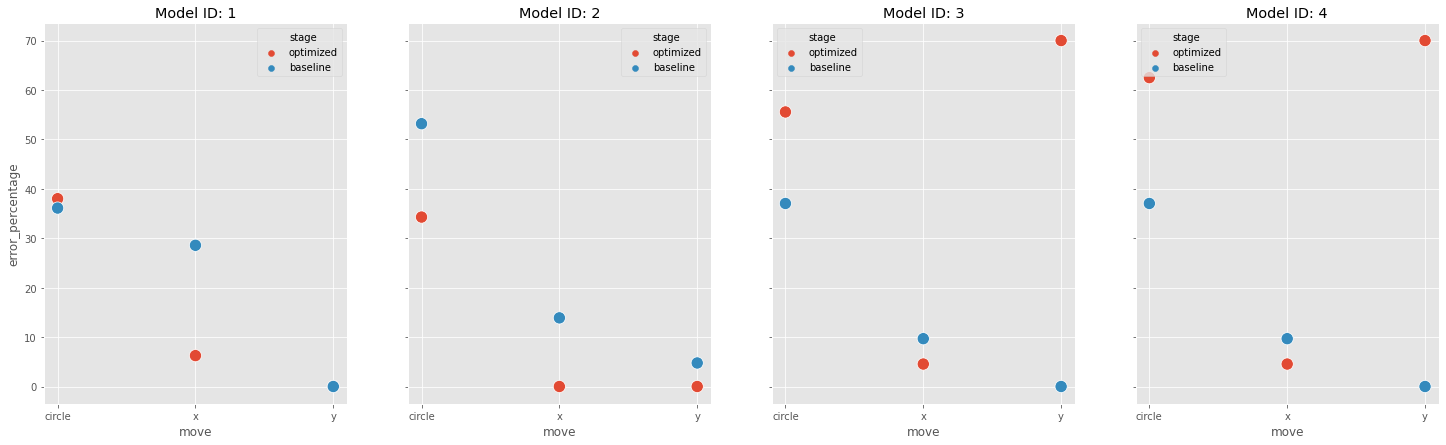

In [118]:
fig, ax = plt.subplots(ncols=4, sharey=True, sharex=True, figsize=(25,7))

marker_size=150

sns.scatterplot(data=results[results['id'] == 1], x='move', y='error_percentage', hue='stage', ax=ax[0], s=marker_size)
sns.scatterplot(data=results[results['id'] == 2], x='move', y='error_percentage', hue='stage', ax=ax[1], s=marker_size)
sns.scatterplot(data=results[results['id'] == 3], x='move', y='error_percentage', hue='stage', ax=ax[2], s=marker_size)
sns.scatterplot(data=results[results['id'] == 4], x='move', y='error_percentage', hue='stage', ax=ax[3], s=marker_size)

for i in range(4):
    ax[i].set_title(f'Model ID: {i+1}')

In [100]:
model_setups = [
    (rf_2, rf_2_settings['hz'], (0,1), rf_2_settings['model'], 2,'optimized', rf_2_settings['features']),
    (random_forest_50hz, 50, (1,1), 'random_forest', 2, 'baseline', ['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z'])
]

In [106]:
def run_validation_optimized_single(model_setups, dataset_path, dataset, is_plot=False, is_save_results=False):
    validation_results = []
    
    if is_plot:
        fig, ax = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(30,7))

        blue_patch = mpatches.Patch(color='blue', label='X Movement')
        red_patch = mpatches.Patch(color='red', label='Y Movement')
        green_patch = mpatches.Patch(color='green', label='Circle Movement')
        fig.legend(handles=[blue_patch, red_patch, green_patch])

        fig.tight_layout()

    for setup in model_setups:
        MODEL = setup[0]
        FREQ = setup[1]
        SIGNALS = setup[-1]
        STEP = (1000 / FREQ)
        
        COL = setup[2][0]

        df_val = pd.read_csv(dataset_path).set_index('ms')
        
        # initialize empty dataset to collect results
        inf_results = pd.DataFrame([],columns=['start','end','result'])

        df_downsampled = downsample_df(df_val, period=STEP)
        df_filtered = filter_df_by_signals(df_downsampled, SIGNALS)
        df_inference = transform_data_for_inference(df_filtered)
        
        # generate a list of steps    
        inference_step = list(np.arange(0, df_val.index[-1] + 1 - 1010, step=STEP))
        
        results_for_plot = []

        for st in inference_step:
            res = np.argmax(run_inference(df_inference, MODEL, st, STEP))
            inf_results = pd.concat([inf_results, pd.DataFrame([{'start':st,'end':st+1000,'result':res}])], axis=0)

            if res in [1,2,3]:
                color = line_color(res)
                results_for_plot.append((color, st))
                
            
        # Plot signals
        if is_plot:
            ax[COL].plot(df_filtered)

            for r in results_for_plot:
                color_plot = r[0]
                st_plot = r[1]   

                ax[COL].axvline(x=st_plot+500, ymin=0, ymax=0.4, color=color_plot, alpha=0.4)    

        # get move from path    
        move = get_move_from_path(dataset_path)

        error_percentage = calculate_error(inf_results, move)
        validation_results.append(
            {
                'model':setup[3],
                'hz':setup[1],
                'dataset':dataset,
                'error_percentage': error_percentage,
                'value_counts': inf_results['result'].value_counts(),
                'stage':setup[5],
                'id':setup[4],
                'move':move
            })

        if is_save_results:
            pd.DataFrame(validation_results).to_csv(f'output/validation_optim/val_res_{dataset}_{move}.csv', index=False)
        
    return validation_results

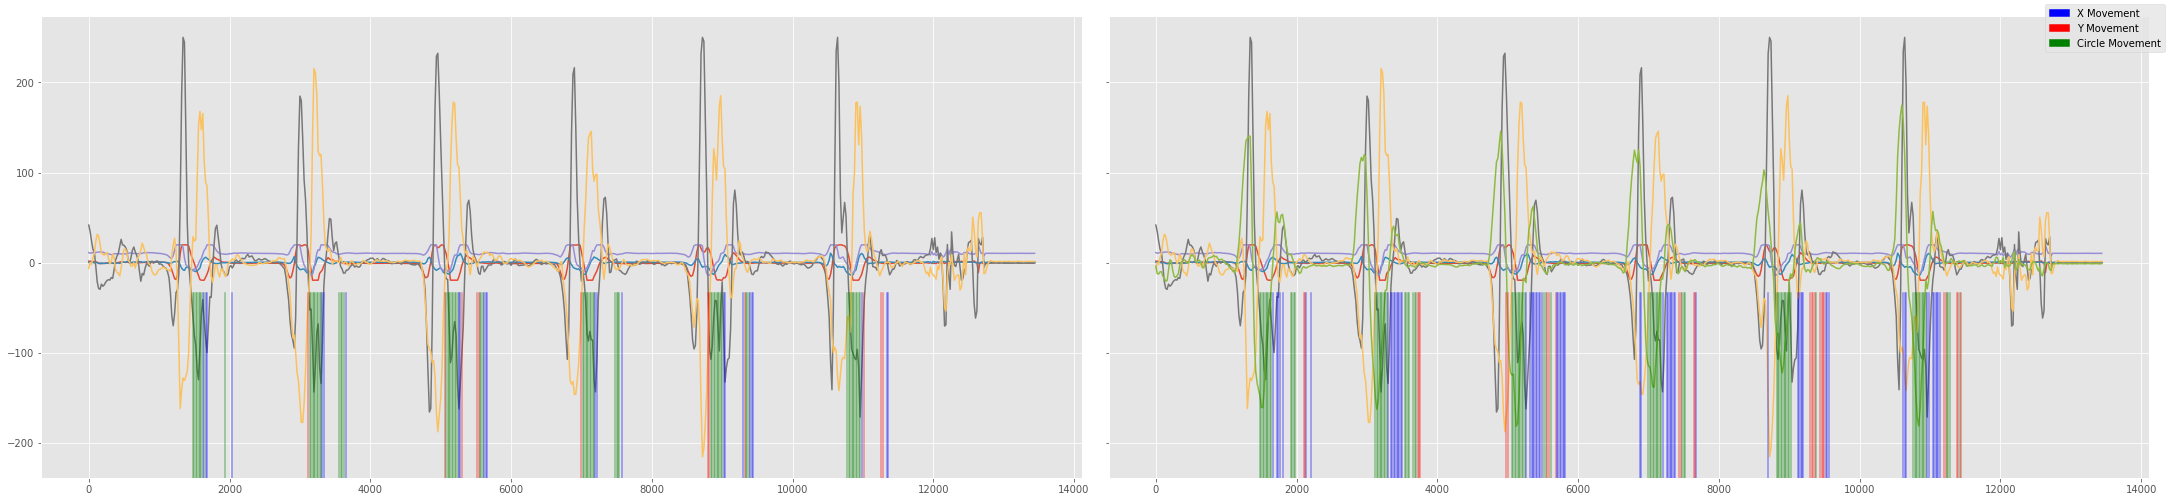

In [107]:
results_circle = run_validation_optimized_single(model_setups, 'data/validation/move_circle_20210522_1.csv', 'base', True, False)

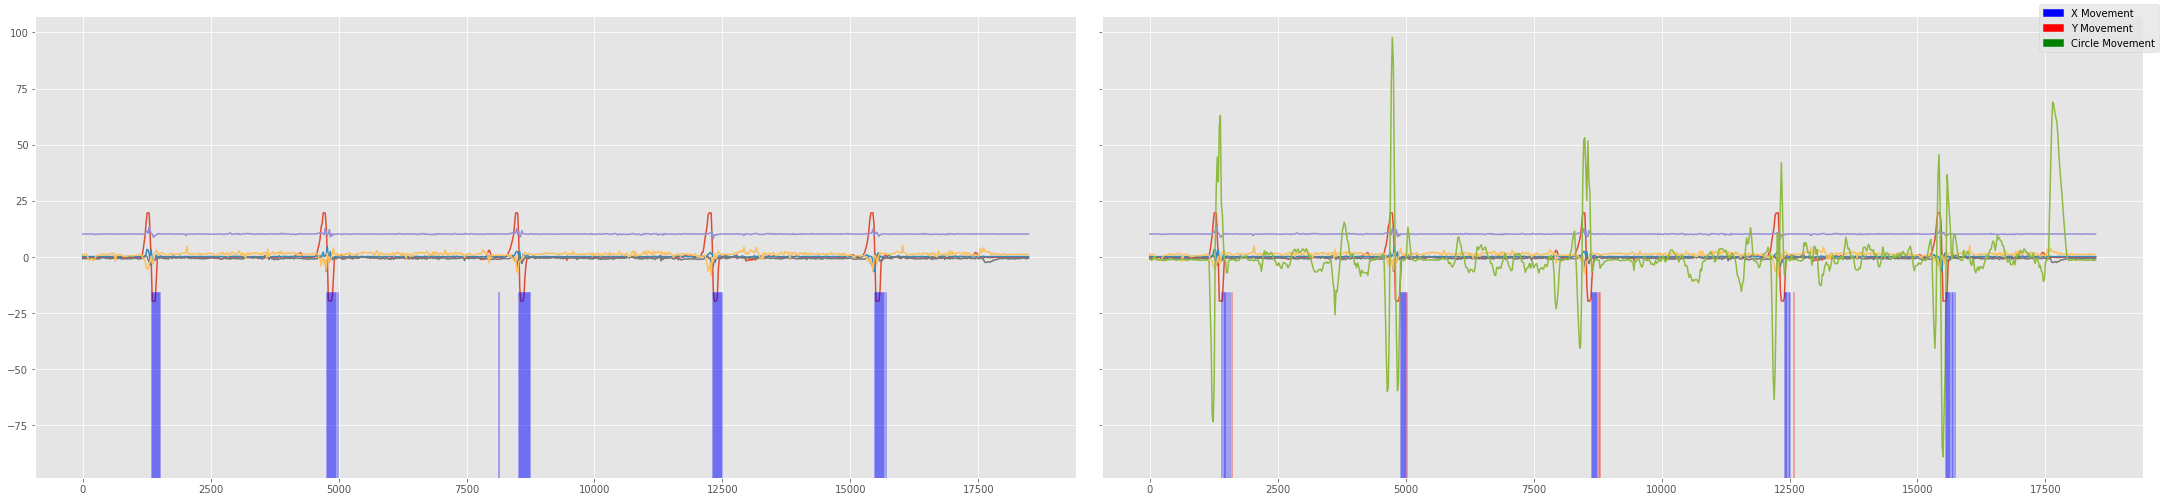

In [110]:
results_x = run_validation_optimized_single(model_setups, 'data/validation/move_x_20210522_1.csv', 'base', True, False)

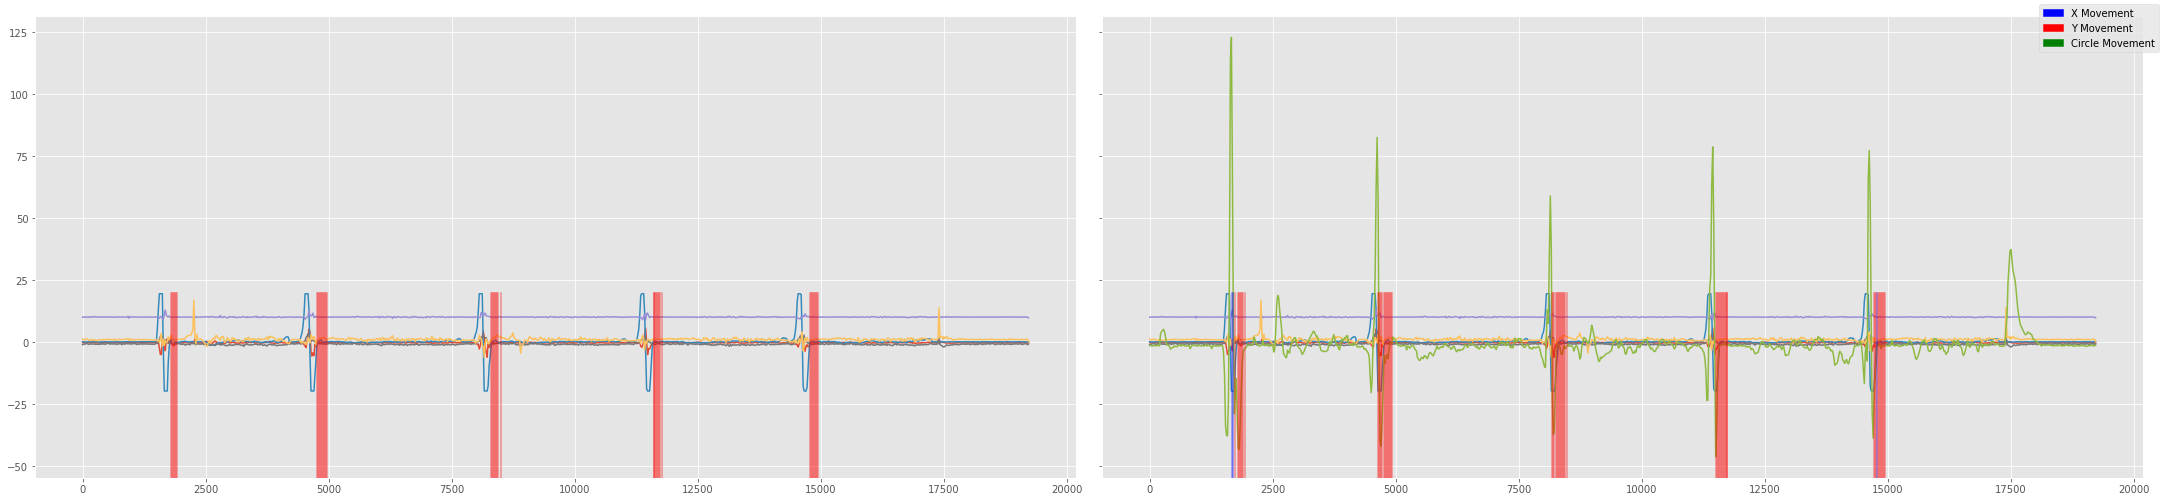

In [109]:
results_y = run_validation_optimized_single(model_setups, 'data/validation/move_y_20210522_1.csv', 'base', True, False)